# introductory text (explain: dataset, task)

Q: what dataset are you working with?  what are you trying to do? .. 

My dataset is titled 'Injury Prediction In Competitive Runners With Machine Learning'. I chose the week-based dataset, which comprised of features pertaining to training, load, and recovery based on a weekly approach that can be used to predict whether a competitive runner gets injured. The following is descriptions of the features, pulled directly from the dataset:

"For the week approach the summarized features for a specific week are the following:

nr. sessions (total number of sessions completed)
nr. rest days (number of days without a training)
total kms (total running mileage)
max km one day (the maximum number of kilometers completed by running on a single day)
total km Z3-Z4-Z5-T1-T2 (the total number of kilometers done in Z3 or faster, corresponding to
			running above the aerobic threshold)
nr. tough sessions (effort in Z5, T1, T2, corresponding to running above the anaerobic threshold
		    and/or intensive track intervals)
nr. days with interval session (number of days that contained a session in Z3 or faster)
total km Z3-4 (number of kilometers covered in Z3-4, between the aerobic and anaerobic threshold)
max km Z3-4 one day (furthest distance ran in Z3-4 on a single day)
total km Z5-T1-T2 (total distance ran in Z5-T1-T2)
max km Z5-T1-T2 one day (furthest distance ran in Z5-T1-T2 on a single day)
total hours alternative training (total time spent on cross training)
nr. strength trainings (number of strength trainings completed)
avg exertion (the average rating in exertion based on the athlete's own perception of how
	      tough each training has been)
min exertion (the smallest rating in exertion of all trainings of the week)
max exertion (the highest rating in exertion of all trainings of the week)
avg training success (the average rating in how well each training went, according to
		      the athlete's own perception)
min training success (the smallest rating in training success of the week)
max training success (the highest rating in training success of the week)
avg recovery (the average rating in how well rested the athlete felt before each session)
min recovery (the smallest rating in how well rested the athlete felt before a session)
max recovery (the highest rating in how well rested the athlete felt before a session)"

Variables that reference Z3,Z4,T1, etc are referencing periods spent within a certain heart rate zone. 

The documentation that accompanies the dataset also describes:
"For the week approach the suffix ".1" means the week starting two 
weeks before the injury, and the suffix ".2" the week starting three weeks before
the event day. 

Furthermore, both data sets include a binary column indicating whether 
this training setup resulted in an injury (1) or not (0)."

My task includes developing the most accurate model possible that will let me predict injury (1) or not (0) based on the attributes described above. In order to accomplish this, I visualized the data and utilized cluster-based stratified sub-sampling to get a sample group that accounts for the imbalance between injured and noninjured in the dataset. I then used this sample group to train a variety of models, where I then ran metrics to determine the best model. 


# import requisite modules

In [25]:
# python code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

# helper functions (if necessary)

In [26]:
# python code

# pre-process, analyze dataset

In [27]:
# python code
dfWeek = pd.read_csv('~/Downloads/dataverse_files/week_approach_maskedID_timeseries.csv')

#will focus on week dataset

#process/analyze data
#check for missing values
dfWeek.dropna()

#figure out percentage of injured vs not injured
percentage = (dfWeek['injury'].value_counts()) / len(dfWeek) * 100
print(percentage)

#dropping unimportant cols
df = dfWeek.drop (['Athlete ID','rel total kms week 0_1',
                   'rel total kms week 0_2', 'rel total kms week 1_2', 'Date'], axis=1)

0    98.656479
1     1.343521
Name: injury, dtype: float64


# visualize dataset

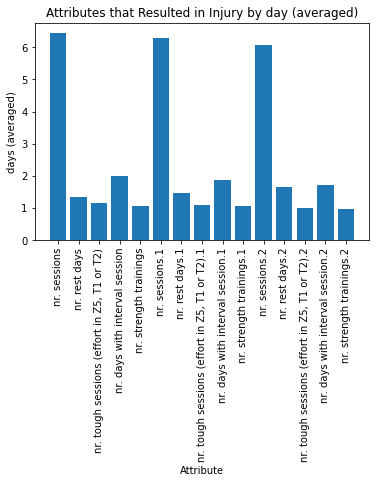

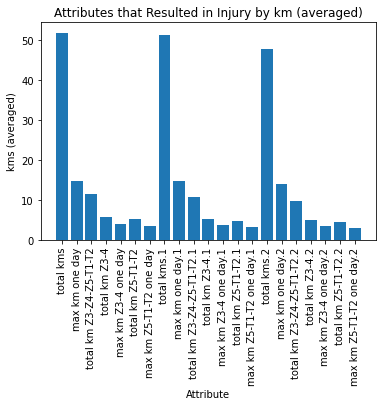

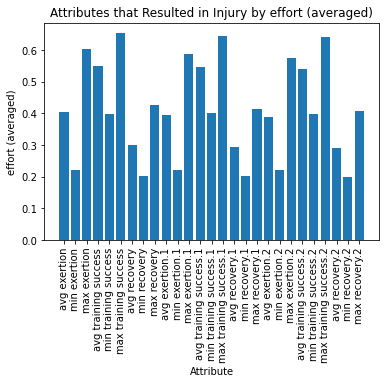

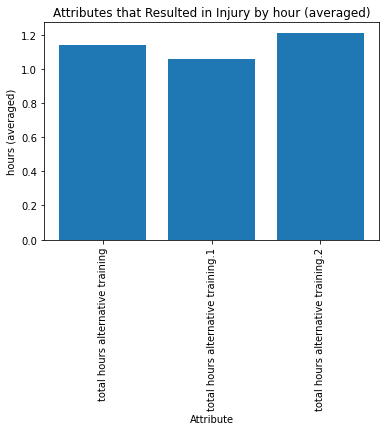

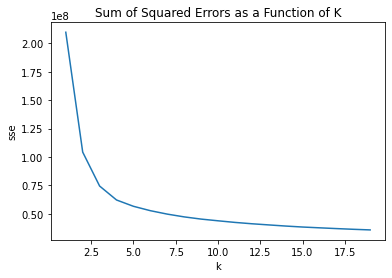

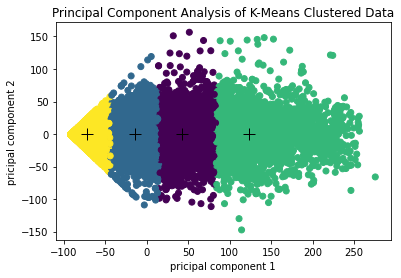

/var/folders/mw/tsz00_l547d0r6x4qyl5fcx80000gn/T/ipykernel_7328/1163167642.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNon['clusters']=clusterLabels


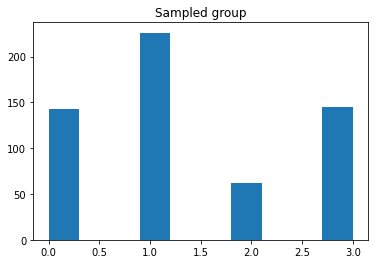

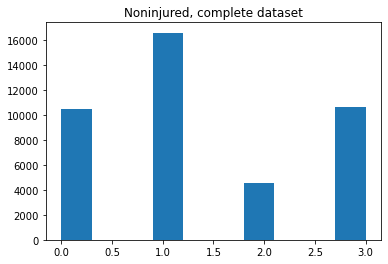

In [28]:
# python code
#visualization - day basis
dayBasis = ['nr. sessions','nr. rest days', 'nr. tough sessions (effort in Z5, T1 or T2)',
            'nr. days with interval session', 'nr. strength trainings','nr. sessions.1', 
            'nr. rest days.1','nr. tough sessions (effort in Z5, T1 or T2).1',
            'nr. days with interval session.1','nr. strength trainings.1',
            'nr. sessions.2', 'nr. rest days.2', 
            'nr. tough sessions (effort in Z5, T1 or T2).2', 'nr. days with interval session.2',
            'nr. strength trainings.2',]
days = []
for x in dayBasis:
    i = dfWeek['injury']==1
    val = dfWeek[x][i]
    average = np.average(val)
    days.append(average)


plt.figure()
plt.bar(dayBasis,days)
plt.xlabel('Attribute')
plt.ylabel('days (averaged)')
plt.xticks(rotation='vertical')
plt.title('Attributes that Resulted in Injury by day (averaged)')
plt.show()


#visualization - km basis
kmBasis = ['total kms', 'max km one day', 'total km Z3-Z4-Z5-T1-T2',
           'total km Z3-4','max km Z3-4 one day', 'total km Z5-T1-T2', 
           'max km Z5-T1-T2 one day','total kms.1', 'max km one day.1', 
           'total km Z3-Z4-Z5-T1-T2.1', 'total km Z3-4.1', 'max km Z3-4 one day.1', 
           'total km Z5-T1-T2.1', 'max km Z5-T1-T2 one day.1', 'total kms.2',
           'max km one day.2', 'total km Z3-Z4-Z5-T1-T2.2', 'total km Z3-4.2',
           'max km Z3-4 one day.2', 'total km Z5-T1-T2.2', 'max km Z5-T1-T2 one day.2']

kms = []
for x in kmBasis:
    i = dfWeek['injury']==1
    val = dfWeek[x][i]
    average = np.average(val)
    kms.append(average)


plt.figure()
plt.bar(kmBasis,kms)
plt.xlabel('Attribute')
plt.ylabel('kms (averaged)')
plt.xticks(rotation='vertical')
plt.title('Attributes that Resulted in Injury by km (averaged)')
plt.show()


#visualization - effort basis
effortBasis = ['avg exertion', 'min exertion', 'max exertion', 'avg training success',
               'min training success', 'max training success', 'avg recovery', 
               'min recovery', 'max recovery', 'avg exertion.1', 'min exertion.1',
               'max exertion.1', 'avg training success.1', 'min training success.1',
               'max training success.1', 'avg recovery.1', 'min recovery.1',
               'max recovery.1', 'avg exertion.2', 'min exertion.2',
               'max exertion.2', 'avg training success.2', 'min training success.2',
               'max training success.2', 'avg recovery.2', 'min recovery.2',
               'max recovery.2']

effort = []
for x in effortBasis:
    i = dfWeek['injury']==1
    val = dfWeek[x][i]
    average = np.average(val)
    effort.append(average)


plt.figure()
plt.bar(effortBasis,effort)
plt.xlabel('Attribute')
plt.ylabel('effort (averaged)')
plt.xticks(rotation='vertical')
plt.title('Attributes that Resulted in Injury by effort (averaged)')
plt.show()



#visualization - hour basis
hourBasis = ['total hours alternative training', 'total hours alternative training.1',
             'total hours alternative training.2']

hours = []
for x in hourBasis:
    i = dfWeek['injury']==1
    val = dfWeek[x][i]
    average = np.average(val)
    hours.append(average)


plt.figure()
plt.bar(hourBasis,hours)
plt.xlabel('Attribute')
plt.ylabel('hours (averaged)')
plt.xticks(rotation='vertical')
plt.title('Attributes that Resulted in Injury by hour (averaged)')
plt.show()



#cluster based stratified sub-sampling

#Run clustering on non injured

#make dataframe for only non-injured
dfNon = df[df['injury']==0]

#SSE
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k).fit(dfNon)
    sse[k] = kmeans.inertia_
    # intertia is sse

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('sse')
plt.title('Sum of Squared Errors as a Function of K')
plt.show()

#bends at 4
kmeans = KMeans(n_clusters=4)
model = kmeans.fit(dfNon)

clusterLabels = kmeans.labels_

#visualization of cluster

pca = PCA(n_components=2)
pca.fit(dfNon)
dfPCA = pca.transform(dfNon)

#PCA on Centroids
centroids = pca.transform(kmeans.cluster_centers_)

#Plotting
plt.scatter(dfPCA[:, 0], dfPCA[:, 1],c=clusterLabels)
plt.plot(centroids[:,0], centroids[:,1], 'k+', markersize=12)
plt.xlabel('pricipal component 1')
plt.ylabel('pricipal component 2')
plt.title('Principal Component Analysis of K-Means Clustered Data')
plt.show()

dfNon['clusters']=clusterLabels

#stratified sub sampling on clustered data

#make dataframe for only injured
dfInjured = df[df['injury']==1]

#sub sampling
percentGroups = len(dfInjured)/len(dfNon)
nonSample = dfNon.groupby('clusters', group_keys=False).apply(lambda x: x.sample(frac=percentGroups))
nonSS= nonSample.drop(['clusters'], axis=1)

#combine into one dataframe
frames = [dfInjured,nonSS]
dfMain = pd.concat(frames)

plt.hist(nonSample['clusters'])
plt.title('Sampled group')
plt.show()
plt.hist(dfNon['clusters'])
plt.title('Noninjured, complete dataset')
plt.show()

# experiment with algorithms, feature sets, parameters, etc.,

Accuracy, Linear SVM: 0.5438748913987836
Recall, Linear SVM 0.5438934178743962
Precision, Linear SVM 0.5439730792498487
Accuracy, Poly SVM: 0.5082536924413553
Recall, Poly SVM 0.5082684178743961
Precision, Poly SVM 0.5082779154827399
Accuracy Tree: 0.48566463944396177
Recall Tree 0.48568085748792267
Precision Tree 0.48566085542030246


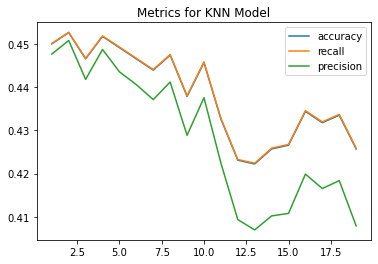

Accuracy KNN: 0.44917463075586445
Recall KNN 0.44931310386473433
Precision KNN 0.44357673899599365


In [29]:
# python code
#Experimenting with algorithms
#split data frame
X = dfMain.drop (['injury'], axis=1)
y = dfMain['injury']
stats = []
algNames = []


#SVM
clf = SVC(gamma='auto',kernel='linear')
clf.fit(X, y)
y_pred = cross_val_predict(clf, X, y, cv=5)
#accuracy
accuracy = accuracy_score(y, y_pred)
print('Accuracy, Linear SVM:',accuracy)
#recall
recall = recall_score(y, y_pred, average='macro')
print('Recall, Linear SVM',recall)
#precision
precision = precision_score(y, y_pred, average='macro')
print('Precision, Linear SVM',precision)
stats.append(accuracy)
stats.append(recall)
stats.append(precision)
algNames.append('Accuracy, Linear SVM:')
algNames.append('Recall, Linear SVM')
algNames.append('Precision, Linear SVM')

clf = SVC(gamma='auto',kernel='poly')
clf.fit(X, y)
y_pred = cross_val_predict(clf, X, y, cv=5)
#accuracy
accuracy = accuracy_score(y, y_pred)
print('Accuracy, Poly SVM:',accuracy)
#recall
recall = recall_score(y, y_pred, average='macro')
print('Recall, Poly SVM',recall)
#precision
precision = precision_score(y, y_pred, average='macro')
print('Precision, Poly SVM',precision)
stats.append(accuracy)
stats.append(recall)
stats.append(precision)
algNames.append('Accuracy, Poly SVM:')
algNames.append('Recall, Poly SVM')
algNames.append('Precision, Poly SVM')

#linear is best


#Decision Tree
dTree= tree.DecisionTreeClassifier()
dTree = tree.DecisionTreeClassifier(criterion='entropy',splitter='best')
dTree.fit(X,y)
y_predTree = cross_val_predict(dTree, X, y, cv=5)
#accuracy
accuracy = accuracy_score(y, y_predTree)
print('Accuracy Tree:',accuracy)
#recall
recall = recall_score(y, y_predTree, average='macro')
print('Recall Tree',recall)
#precision
precision = precision_score(y, y_predTree, average='macro')
print('Precision Tree',precision)
stats.append(accuracy)
stats.append(recall)
stats.append(precision)
algNames.append('Accuracy Tree:')
algNames.append('Recall Tree')
algNames.append('Precision Tree')



#KNN
#Make a loop to test n_neighborsk graph metric results
accuracy = []
recall = []
precision = []
xVal = []
for r in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors=r,weights='distance')
    neigh.fit(X, y)
    y_pred = cross_val_predict(neigh, X, y, cv=5)
    accuracyS = accuracy_score(y, y_pred)
    accuracy.append(accuracyS)
    recallS = recall_score(y, y_pred, average='macro')
    recall.append(recallS)
    precisionS = precision_score(y, y_pred, average='macro')
    precision.append(precisionS)
    xVal.append(r)
    
    
plt.plot(xVal, accuracy, label = "accuracy")
plt.plot(xVal, recall, label = "recall")
plt.plot(xVal, precision, label = "precision")
plt.title('Metrics for KNN Model')
plt.legend()
plt.show()

#Best classification model
neigh = KNeighborsClassifier(n_neighbors=5,weights='distance')
neigh.fit(X, y)

y_predN = cross_val_predict(neigh, X, y, cv=5)
#accuracy
accuracy = accuracy_score(y, y_predN)
print('Accuracy KNN:',accuracy)
#recall
recall = recall_score(y, y_predN, average='macro')
print('Recall KNN',recall)
#precision
precision = precision_score(y, y_predN, average='macro')
print('Precision KNN',precision)
stats.append(accuracy)
stats.append(recall)
stats.append(precision)
algNames.append('Accuracy KNN:')
algNames.append('Recall KNN')
algNames.append('Precision KNN')

# visualize experimental results

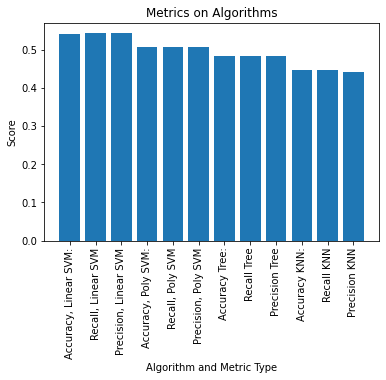

In [30]:
# python code
#visualization of experimentation results
plt.figure()
plt.bar(algNames,stats)
plt.xlabel('Algorithm and Metric Type')
plt.ylabel('Score')
plt.xticks(rotation='vertical')
plt.title('Metrics on Algorithms')
plt.show()

# analyze / explain experimental results

Q: what worked? what didn't? WHY? 

Overall my accuracy/precision/recall was not very high for any algorithms I tried. This is likely due to having such high-dimensional data and trying to predict a binary result based on a complex combination of data. 

Overall, the Support Vector Machine and the Decision Tree were the best algorithms for this dataset, although between runs the Support Vector Machine generally had the highest levels of accuracy/precision/recall. This makes sense because a Support Vector Machine is known for being good with high-dimensional datasets, which matches my data. 

I also tried a K-Nearest Neighbors algorithm, which performed the worst out of all of them. This makes sense because KNN algorithms are known for succumbing to the 'curse of dimensionality', which my dataset would likely cause. 

I also experimented between 'linear' and 'poly' kernel parameters within the SVM since it was the most promising algorithm. While it certainly made a difference on individual runs, overall when the algorithms were run repeatedly the linear and poly SVMs switched off between the best performance metrics, proving no significant difference. 

As for feature selection, I decided to only drop the 'Athlete ID','rel total kms week 0_1', 'rel total kms week 0_2', 'rel total kms week 1_2', and 'Date' columns because they were either irrelevent or in a different metric format than the rest of the data, which would mess with the results. 

# conclusion 

Overall, when training models to predict injury in competitive runners based on a variety of training/recovery attributes, I found that Support Vector Machines worked the best. I used cluster-based sub-sampling to achieve this, and experimented with K-Nearest Neighbors and Decision Tree algorithms as well. It makes sense that SVM worked best due to its ability to work with high-dimensional data. 